# Exploratory Data Analysis of Instagram Labels DataSet

## Author: Bill Dusch

In this notebork, we investigate the labels created by Google Vision on instagram posts. Each label has a score from 0 to 1 indicating how likely that the picture corresponds to that label. The Instagram Machine Learning competition is a regression problem where we try to predict the number of likes an Instagram post makes in 24 hours.

### Imports

First, let's import what we need:

In [1]:
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

import scipy.stats as stats

# Machine Learning
# supervised learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
# model selection
from sklearn.model_selection import GridSearchCV
# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
# unsupervised learning
from sklearn.decomposition import PCA

# Import from Instagram package
from data import usernames, thresholds
from score import get_points, instagram_scorer
# These are the instagram accounts we are investigating
print usernames
print thresholds

['kissinfashion', 'instagood', 'beautifuldestinations', 'etdieucrea', 'josecabaco']
{'beautifuldestinations': 0.105, 'kissinfashion': 0.095, 'josecabaco': 0.185, 'etdieucrea': 0.145, 'instagood': 0.145}


C:\Anaconda3\envs\Python2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Import the data

In [2]:
labels = {user: pd.read_csv(('../data/labels/' + user + '.csv'), sep='\t', encoding='utf-8')
              for user in usernames}
train = {user: pd.read_csv(('../data/labels/' + 'train_' + user + '.csv'), sep='\t', encoding='utf-8')
              for user in usernames}
test = {user: pd.read_csv(('../data/labels/' + 'test_' + user + '.csv'), sep='\t', encoding='utf-8')
              for user in usernames}

### Exploratory Data Analysis

In [3]:
# List all the features of the dataset
for user in usernames:
    print user
    print labels[user].dtypes
    print

kissinfashion
likes                     int64
username                 object
display_src              object
toy                     float64
product                 float64
interaction             float64
textile                 float64
fur                     float64
vacation                float64
sea                     float64
hair                    float64
clothing                float64
black_hair              float64
hairstyle               float64
long_hair               float64
brown_hair              float64
blond                   float64
undergarment            float64
supermodel              float64
leg                     float64
finger                  float64
photo_shoot             float64
thigh                   float64
abdomen                 float64
hand                    float64
human_body              float64
model                   float64
neck                    float64
furniture               float64
room                    float64
                         .

In [4]:
# Get Summary statistics
for user in usernames:
    print user
    print labels[user]['likes'].describe()
    print

kissinfashion
count     1007.000000
mean     23844.772592
std       5419.584051
min       1351.000000
25%      20007.000000
50%      23500.000000
75%      27604.000000
max      46712.000000
Name: likes, dtype: float64

instagood
count     1006.000000
mean      9656.341948
std       2714.324404
min        996.000000
25%       7901.250000
50%       9384.000000
75%      11162.250000
max      21813.000000
Name: likes, dtype: float64

beautifuldestinations
count      1006.000000
mean     172748.477137
std       38386.759443
min       67068.000000
25%      144072.250000
50%      167978.000000
75%      196823.750000
max      351445.000000
Name: likes, dtype: float64

etdieucrea
count    1007.000000
mean     2542.422046
std       614.692339
min       663.000000
25%      2214.000000
50%      2493.000000
75%      2833.000000
max      6467.000000
Name: likes, dtype: float64

josecabaco
count    1006.000000
mean      369.630219
std       161.806187
min       109.000000
25%       260.000000
50%    

Get distribution of likes

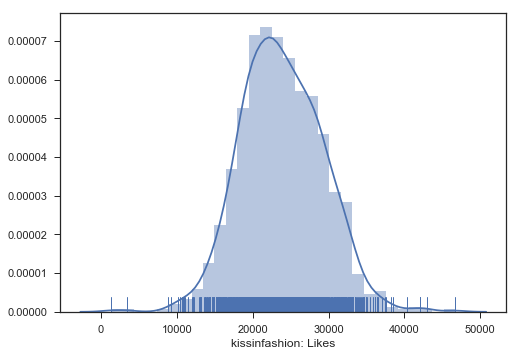

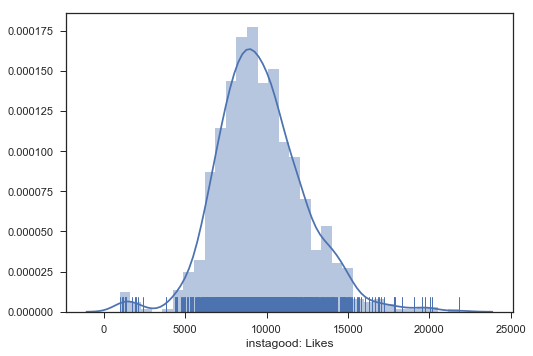

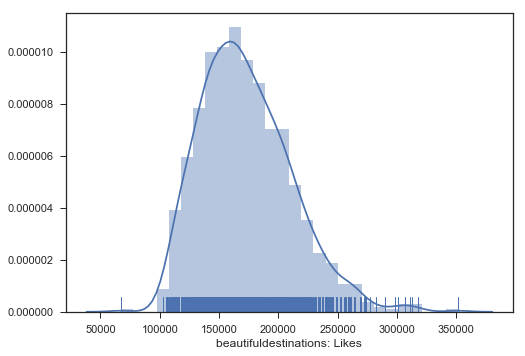

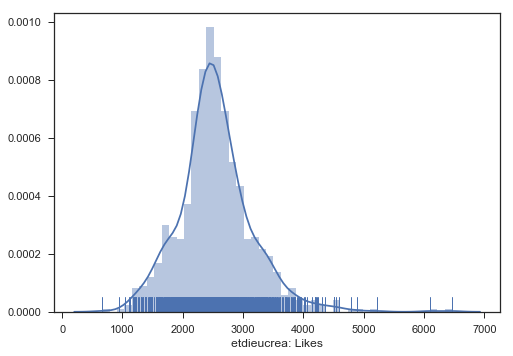

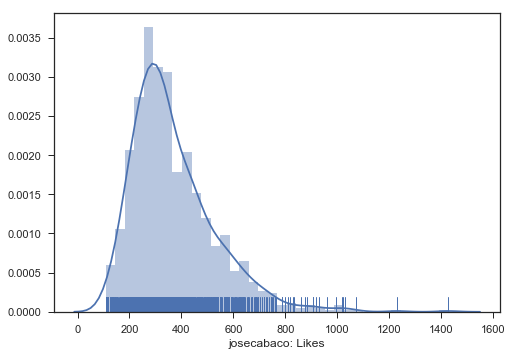

In [5]:
for user in usernames:
    name = user + ": Likes"
    sns.distplot(labels[user]['likes'], rug=True, axlabel=name)
    sns.plt.show()

In [6]:
# Check normality of data
alpha = 0.05
for user in usernames:
    chi2, p = stats.normaltest(labels[user]['likes'])
    if p > alpha:
        print '{}: {}'.format(user, p)
    else:
        print '{}: {}*'.format(user, p)

kissinfashion: 0.00233644758304*
instagood: 2.68902100841e-14*
beautifuldestinations: 1.37194460263e-19*
etdieucrea: 5.24321055853e-41*
josecabaco: 2.23935987267e-66*


All of the likes are normally distributed with p < 0.05; highest p-value is kissinfashion with p = 0.002.

In [7]:
# Clean up dataset
# datasets to prepare for ML
y_label, X_label = {}, {}
y_train, X_train = {}, {}
y_test, X_test = {}, {}
# Iterate over all datasets. Likes is the Y data, take only labels for the X data, and replace NAs with 0
for user in usernames:
    # Label dataset
    y_label[user] = labels[user]['likes'].values
    X_label[user] = labels[user].ix[:, 3:]
    X_label[user].fillna(0, inplace=True)
    X_label[user] = X_label[user].values
    # Training dataset
    y_train[user] = train[user]['likes'].values
    X_train[user] = train[user].ix[:, 3:]
    X_train[user].fillna(0, inplace=True)
    X_train[user] = X_train[user].values
    # Test dataset
    y_test[user] = test[user]['likes'].values
    X_test[user] = test[user].ix[:, 3:]
    X_test[user].fillna(0, inplace=True)
    X_test[user] = X_test[user].values

Now let's use PCA to visualize the data in lower dimensions.

kissinfashion: explained variance ratio (first two components): [ 0.12154713  0.10264284]


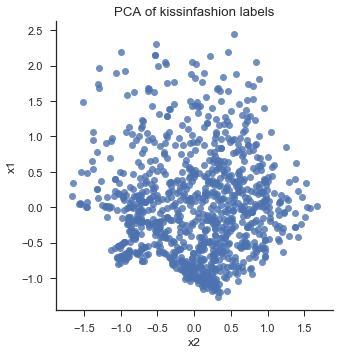

instagood: explained variance ratio (first two components): [ 0.14598247  0.09642022]


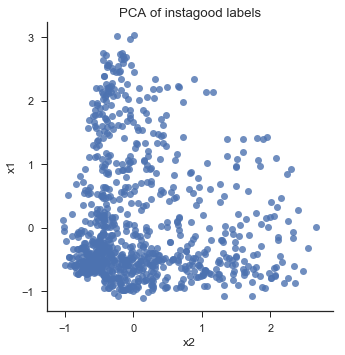

beautifuldestinations: explained variance ratio (first two components): [ 0.11681936  0.11131734]


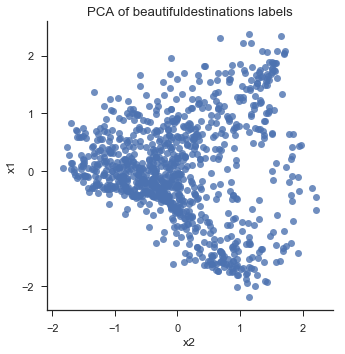

etdieucrea: explained variance ratio (first two components): [ 0.17488156  0.090245  ]


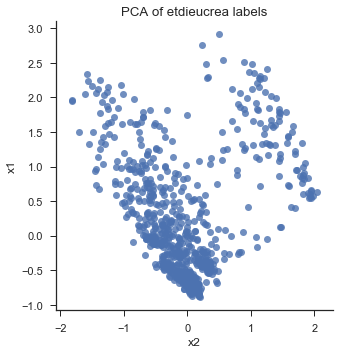

josecabaco: explained variance ratio (first two components): [ 0.09139481  0.07965883]


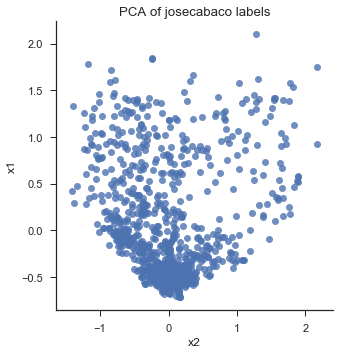

In [8]:
pca = {}
labels_r = {}
for user in usernames:
    pca[user] = PCA(n_components=2)
    labels_r[user] = pca[user].fit(X_label[user]).transform(X_label[user])
    labels_r[user] = pd.DataFrame(columns=['x1', 'x2'], data=labels_r[user])
    print '{}: explained variance ratio (first two components): {}'.format(user, pca[user].explained_variance_ratio_)
    sns.lmplot('x2', 'x1', data=labels_r[user], fit_reg=False)
    plt.title('PCA of {} labels'.format(user))
    sns.plt.show()

### Predictive Data Analysis

Here we apply a number of regression methods on the different users and store them so that we can select the right model

In [9]:
reg = {} # Stores regression objects
y_pred = {} # Predicted number of Likes
mse = {} # Mean Squared Error
mae = {} # Mean Absolute Error
points = {} # Number of points earned by model
max_points = {} # Maximum points is getting the entire test set correct
select = {} # The selected model for the user
for user in usernames:
    # dictionary of models for each user
    reg[user] = {} # Container for regression models
    y_pred[user] = {} # Container for predictions
    mse[user] = {} # container for mean square error score
    mae[user] = {} # container for mean absolute error score
    points[user] = {} # container for instagram points score
    max_points[user] = len(y_test[user]) # Max points for user, entire test set correct
    select[user] = {} # container for model that was selected

In [10]:
# For kicks, let's create a model which just takes the number of likes randomly from the training distribution
model = 'random'
for user in usernames:
    mean = np.mean(y_train[user])
    std = np.std(y_train[user])
    y_pred[user][model] = np.clip(np.random.normal(loc=mean, scale=std, size=len(y_test[user])), 0, np.inf)
    mse[user][model] = mean_squared_error(y_test[user], y_pred[user][model])
    mae[user][model] = mean_absolute_error(y_test[user], y_pred[user][model])
    points[user][model] = get_points(y_test[user], y_pred[user][model], threshold=thresholds[user])
    print '{}: {} MAE ~ {}/{} points'.format(user, mae[user][model], points[user][model], max_points[user])

kissinfashion: 5756.87823557 MAE ~ 48/202 points
instagood: 3049.02172315 MAE ~ 58/202 points
beautifuldestinations: 42184.3020405 MAE ~ 54/202 points
etdieucrea: 659.32359848 MAE ~ 69/202 points
josecabaco: 177.867330839 MAE ~ 46/202 points


In [11]:
# Linear regression - no hyperparameters
model = 'linear'
for user in usernames:
    reg[user][model] = LinearRegression()
    reg[user][model].fit(X_train[user], y_train[user])
    y_pred[user][model] = reg[user][model].predict(X_test[user])
    mse[user][model] = mean_squared_error(y_test[user], y_pred[user][model])
    mae[user][model] = mean_absolute_error(y_test[user], y_pred[user][model])
    points[user][model] = get_points(y_test[user], y_pred[user][model], threshold=thresholds[user])
    print '{}: {} MAE ~ {}/{} points'.format(user, mae[user][model], points[user][model], max_points[user])

kissinfashion: 4602.57502528 MAE ~ 57/202 points
instagood: 2087.99913054 MAE ~ 87/202 points
beautifuldestinations: 33277.1234229 MAE ~ 79/202 points
etdieucrea: 453.45723004 MAE ~ 109/202 points
josecabaco: 131.935522322 MAE ~ 69/202 points


In [12]:
# Ridge regression - 1 hyperparameter (alpha)
model = 'ridge'
# Parameters to tune for CV
parameters = { 'alpha': [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75, 100, 500, 1000] }
for user in usernames:
    # Cross Validation and fitting
    reg[user][model] = GridSearchCV(Ridge(), parameters, cv=5, scoring='neg_mean_absolute_error')
    reg[user][model].fit(X_train[user], y_train[user])
    y_pred[user][model] = reg[user][model].predict(X_test[user])
    mse[user][model] = mean_squared_error(y_test[user], y_pred[user][model])
    mae[user][model] = mean_absolute_error(y_test[user], y_pred[user][model])
    points[user][model] = get_points(y_test[user], y_pred[user][model], threshold=thresholds[user])
    print '{}: {} MAE ~ {}/{} points'.format(user, mae[user][model], points[user][model], max_points[user])

kissinfashion: 4142.25573798 MAE ~ 64/202 points
instagood: 1816.72181263 MAE ~ 95/202 points
beautifuldestinations: 29704.204573 MAE ~ 73/202 points
etdieucrea: 404.257893164 MAE ~ 116/202 points
josecabaco: 116.1684068 MAE ~ 77/202 points


In [13]:
# Lasso regression - 1 hyperparameter (alpha)
model = 'lasso'
# Parameters to tune for CV
parameters = { 'alpha': [0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75, 100, 500, 1000] }
for user in usernames:
    # Cross Validation and fitting
    reg[user][model] = GridSearchCV(Lasso(), parameters, cv=5, scoring='neg_mean_absolute_error')
    reg[user][model].fit(X_train[user], y_train[user])
    y_pred[user][model] = reg[user][model].predict(X_test[user])
    mse[user][model] = mean_squared_error(y_test[user], y_pred[user][model])
    mae[user][model] = mean_absolute_error(y_test[user], y_pred[user][model])
    points[user][model] = get_points(y_test[user], y_pred[user][model], threshold=thresholds[user])
    print '{}: {} MAE ~ {}/{} points'.format(user, mae[user][model], points[user][model], max_points[user])

kissinfashion: 4176.52478816 MAE ~ 65/202 points


C:\Anaconda3\envs\Python2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


instagood: 1821.91547773 MAE ~ 98/202 points
beautifuldestinations: 29575.2704578 MAE ~ 76/202 points
etdieucrea: 405.023896461 MAE ~ 122/202 points
josecabaco: 116.152360358 MAE ~ 75/202 points


In [14]:
# Kernel Ridge regression - 3 hyperparameters (kernel, gamma, alpha)
model = 'kernelridge'
# Parameters to tune for CV
parameters = { 'kernel': ['rbf'],
              'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
              'alpha': [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75, 100, 250, 500, 1000] }
for user in usernames:
    # Cross Validation and fitting
    reg[user][model] = GridSearchCV(KernelRidge(), parameters, cv=5, scoring='neg_mean_absolute_error')
    reg[user][model].fit(X_train[user], y_train[user])
    y_pred[user][model] = reg[user][model].predict(X_test[user])
    mse[user][model] = mean_squared_error(y_test[user], y_pred[user][model])
    mae[user][model] = mean_absolute_error(y_test[user], y_pred[user][model])
    points[user][model] = get_points(y_test[user], y_pred[user][model], threshold=thresholds[user])
    print '{}: {} MAE ~ {}/{} points'.format(user, mae[user][model], points[user][model], max_points[user])

kissinfashion: 4140.0868502 MAE ~ 64/202 points
instagood: 1817.33653531 MAE ~ 99/202 points
beautifuldestinations: 29679.0903986 MAE ~ 75/202 points
etdieucrea: 404.235726669 MAE ~ 122/202 points
josecabaco: 116.177468668 MAE ~ 79/202 points


In [15]:
# Support Vector Machine regression - 3 hyperparameters (kernel, gamma, C)
model = 'svr'
# Parameters to tune for CV
parameters = { 'kernel': ['rbf'],
              'gamma': ['auto', 1e-2, 1e-3, 1e-4, 1e-5],
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
for user in usernames:
    # Cross Validation and fitting
    reg[user][model] = GridSearchCV(SVR(), parameters, cv=5, scoring='neg_mean_absolute_error')
    reg[user][model].fit(X_train[user], y_train[user])
    y_pred[user][model] = reg[user][model].predict(X_test[user])
    mse[user][model] = mean_squared_error(y_test[user], y_pred[user][model])
    mae[user][model] = mean_absolute_error(y_test[user], y_pred[user][model])
    points[user][model] = get_points(y_test[user], y_pred[user][model], threshold=thresholds[user])
    print '{}: {} MAE ~ {}/{} points'.format(user, mae[user][model], points[user][model], max_points[user])

kissinfashion: 4156.72564171 MAE ~ 62/202 points
instagood: 1915.69057442 MAE ~ 101/202 points
beautifuldestinations: 30819.6865347 MAE ~ 73/202 points
etdieucrea: 400.5017613 MAE ~ 124/202 points
josecabaco: 113.583308551 MAE ~ 77/202 points


In [22]:
# Random Forest Regressor - 5 hyperparameters
model = 'randomforest'
# Parameters to tune for CV
parameters = { 'n_estimators': [120, 300, 500, 800],
             'max_depth': [5, 8, 15, 25, 30],
             'min_samples_split': [2, 5, 10, 15, 100],
             'min_samples_leaf': [1, 2, 5, 10],
             'max_features': ['log2', 'sqrt', None]
            }
for user in usernames:
    # Cross Validation and fitting
    reg[user][model] = GridSearchCV(RandomForestRegressor(n_jobs=-1), parameters, cv=5, scoring='neg_mean_absolute_error')
    reg[user][model].fit(X_train[user], y_train[user])
    y_pred[user][model] = reg[user][model].predict(X_test[user])
    mse[user][model] = mean_squared_error(y_test[user], y_pred[user][model])
    mae[user][model] = mean_absolute_error(y_test[user], y_pred[user][model])
    points[user][model] = get_points(y_test[user], y_pred[user][model], threshold=thresholds[user])
    print '{}: {} MAE ~ {}/{} points'.format(user, mae[user][model], points[user][model], max_points[user])

kissinfashion: 4150.51052915 MAE ~ 65/202 points
instagood: 1849.58839717 MAE ~ 93/202 points
beautifuldestinations: 29514.5957074 MAE ~ 67/202 points
etdieucrea: 406.166659751 MAE ~ 120/202 points
josecabaco: 115.911653447 MAE ~ 73/202 points


In [23]:
# Select model
choice = 'mae'
for user in usernames:
    if choice == 'mse':
        model = min(mse[user], key=mse[user].get)
    elif choice == 'points':
        model = max(points[user], key=points[user].get)
    elif choice == 'mae':
        model = min(mae[user], key=mae[user].get)
    else:
        # Just use MAE
        model = min(mae[user], key=mse[user].get)
    select[user] = reg[user][model]
    print user, model, select[user].best_params_ if hasattr(select[user], 'best_params_') else None

kissinfashion kernelridge {'alpha': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
instagood ridge {'alpha': 15}
beautifuldestinations randomforest {'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 300, 'max_depth': 30, 'min_samples_leaf': 1}
etdieucrea svr {'kernel': 'rbf', 'C': 1000, 'gamma': 'auto'}
josecabaco svr {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}


In [24]:
# Save models to a file
import shelve
filename = '../src/models/labels.pkl'
storage = shelve.open(filename)
for user in usernames:
    storage[user] = select[user]
storage.close()

In [25]:
# Get columns of the labels and store in a file
columns = {}
labelname = '../src/models/labelcolumns.pkl'
storage = shelve.open(labelname)
for user in usernames:
    columns[user] = labels[user].ix[:, 3:].columns.values.tolist()
    print '{}: {} ...'.format(user, columns[user][0:5])
    storage[user] = columns[user]
storage.close()

kissinfashion: [u'toy', u'product', u'interaction', u'textile', u'fur'] ...
instagood: [u'product', u'vacation', u'sea', u'clothing', u'photo_shoot'] ...
beautifuldestinations: [u'vacation', u'resort', u'caribbean', u'estate', u'lagoon'] ...
etdieucrea: [u'interaction', u'textile', u'fur', u'vacation', u'estate'] ...
josecabaco: [u'toy', u'product', u'textile', u'sea', u'clothing'] ...


In [26]:
# Testing the storage to see if it works and we get our models back
storage = shelve.open(filename)
for user in usernames:
    regression = storage[user]
    print user
    # print regression model
    print regression
    # print one prediction
    print regression.predict(X_test[user][0, :].reshape(1, -1))
    print
storage.close()

kissinfashion
GridSearchCV(cv=5, error_score='raise',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'gamma': [0.01, 0.001, 0.0001, 1e-05], 'alpha': [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75, 100, 250, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)
[ 24034.87399578]

instagood
GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)
[ 8532.33941752]

beautifuldestinations
G